In [1]:
import pandas as pd 
import numpy as np
import random 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [2]:
file_path = os.path.abspath(os.getcwd())

def GetData(file_path): 
    ## Read the Data for the File. Test, Train, and Gender Submission

    return {
        'test': pd.read_csv(file_path + '/test.csv'),
        'train': pd.read_csv(file_path + '/train.csv')
    }, {'gender_submission': pd.read_csv(file_path + '/gender_submission.csv')}


### Get the Data from the CSV files, returned in a dictionary format
dataframe, gender_submission = GetData(file_path)

# Confirm the test data is returned
dataframe['test'].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
def GetNulls(dataframe): 
    ##function that returns the null values from all the columns in both the test and train dataframes listed in the dataframe dictionary. 

    get_nulls = {} 
    for key, value in dataframe.items(): 
        get_nulls[key] = value.isna().sum()
    
    return get_nulls 

get_nulls = GetNulls(dataframe)

print(GetNulls(dataframe))

{'test': PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64, 'train': PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64}


In [4]:
def FillNaAgeFare(dataframe): 
    ## Fills the na values for the age column in the test and train dataframes. Replaces them with the median age. 
    
    for value in dataframe.values(): 
        value['Age'] = value['Age'].fillna(value['Age'].median())
        value['Fare'] = value['Fare'].fillna(value['Fare'].median())
    
    return dataframe 

dataframe = FillNaAgeFare(dataframe)



print(GetNulls(dataframe))

{'test': PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64, 'train': PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64}


In [5]:
def FillNaEmbarked(dataframe): 
    ## Fills unknown values for embarked with 'unkown'. It might pay to know which members embarked from unknown ports, and this might have an impact on their survival rate. 
    
    for value in dataframe.values(): 
        value['Embarked'] = value['Embarked'].fillna('unknown') 
    
    return dataframe 

dataframe = FillNaEmbarked(dataframe) 

print(GetNulls(dataframe))

{'test': PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64, 'train': PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64}


In [6]:
def FillNaCabin(dataframe): 
    ## null values in the cabin column are filled. They are replaced with 'no cabin', as it may be useful to the final model to know which passengers were in an unknown cabin, this might have an impact on the final decision 
    
    for value in dataframe.values(): 
        value['Cabin'] = value['Cabin'].fillna('no cabin')

    return dataframe 

dataframe = FillNaCabin(dataframe) 

print(GetNulls(dataframe))

{'test': PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64, 'train': PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64}


In [7]:
dataframe['train']['PredEveryoneDies'] = 0 
dataframe['train'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PredEveryoneDies
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no cabin,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no cabin,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no cabin,S,0


In [8]:
def PredictionAccuracy(predicted, actual): 
    ## general function for seeing the accuracy of the model. Sees how many
    true = (predicted - actual == 0).value_counts()[True] 
    total = true + (predicted - actual == 0).value_counts()[False]
    return true * 100 / (total) 

accuracy_everyone_dies = PredictionAccuracy(dataframe['train']['PredEveryoneDies'], dataframe['train']['Survived'])
print(accuracy_everyone_dies)

61.61616161616162


In [9]:
def PredMenDie(dataframe): 
    dataframe['train']['MenDie'] = (dataframe['train']['Sex'] == 'female')
    return dataframe

dataframe = PredMenDie(dataframe)
dataframe['train'].head()

men_die_accuracy = PredictionAccuracy(dataframe['train']['MenDie'], dataframe['train']['Survived'])


78.67564534231201


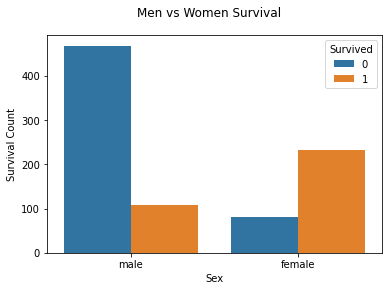

In [10]:
def PlotSurvival(xlabel, ylabel, x_axis, label, train): 
    plt.figure() 
    plt.suptitle(label)
    gender_plot = sns.countplot(data = train, 
                x = x_axis , hue = 'Survived')
    gender_plot.set(xlabel = xlabel, ylabel = ylabel)
    plt.show()
    return None

print(men_die_accuracy)
PlotSurvival('Sex', 'Survival Count', 'Sex', 'Men vs Women Survival', dataframe['train'])

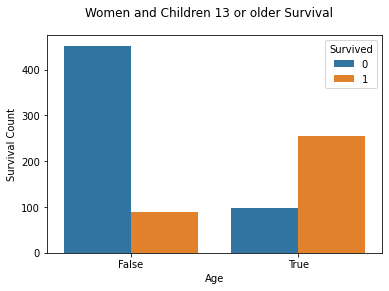

79.2368125701459


In [11]:

def PredWomenChildrenSurvive(dataframe, age): 


    train = dataframe['train']
    train['PredWomenChildrenSurvive{}'.format(age)] = (train['Sex'] == 'female') | (train['Age'] <= age).astype(int)

    PlotSurvival('Age', 'Survival Count', 'PredWomenChildrenSurvive{}'.format(age), 'Women and Children {} or older Survival'.format(age), train)
    

    dataframe['train'] = train


    return dataframe, PredictionAccuracy(dataframe['train']['PredWomenChildrenSurvive{}'.format(age)], dataframe['train']['Survived']) 

dataframe, accuracy_women_children_13_survival = PredWomenChildrenSurvive(dataframe, 13)
print(accuracy_women_children_13_survival)

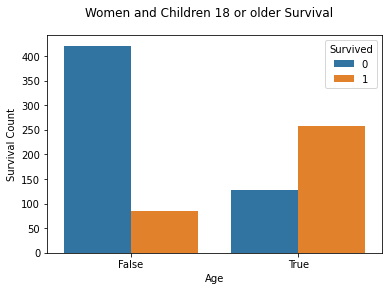

76.0942760942761


In [12]:
dataframe, accuracy_women_children_18_survival = PredWomenChildrenSurvive(dataframe, 18) 
print(accuracy_women_children_18_survival)

In [13]:
def LabelsNeedingEncoding(dataframes, labels):
    le = LabelEncoder()
    for dataframe in dataframes.values(): 
        for label in labels:
            le.fit(dataframe[label])
            dataframe[label] = le.transform(dataframe[label])

    return dataframes



labels_needing_encoding = ['Sex', 'Ticket', 'Cabin', 'Embarked' ]


dataframe = LabelsNeedingEncoding(dataframe, labels_needing_encoding)

In [14]:
def NormalizeFeatures(x):
    for features, values in x.items(): 
        value = values.tolist()

        x[features] = (value - np.mean(value)) / np.std(value)

    return x 

xtrain = dataframe['train'][['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
xtrain = NormalizeFeatures(xtrain)

In [15]:
def TestingTrainingData(): 
    
    dataframe, gender_submission = GetData(file_path)

    passengerid = dataframe['train']['PassengerId']
    y_train = dataframe['train']['Survived'] 

    dataframe = FillNaAgeFare(dataframe) 
    dataframe = FillNaCabin(dataframe) 
    dataframe = FillNaEmbarked(dataframe)

    labels_needing_encoding = ['Sex', 'Ticket', 'Cabin', 'Embarked' ]

    dataframe = LabelsNeedingEncoding(dataframe, labels_needing_encoding) 


    x_train = dataframe['train'][['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

    x_test = dataframe['test'][['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]


    

    x_train = NormalizeFeatures(x_train)
    x_test = NormalizeFeatures(x_test) 

    return  x_test, x_train, y_train, passengerid


xtest, xtrain, ytrain, passengerid = TestingTrainingData()

xtrain.shape[1]


9

In [16]:
## Initialize Hyperparameters 
alpha = 0.05 

## Parameters 
weights = np.random.normal(0, 0.1, 9) 
bias = random.normalvariate(0, 0.1) 

m = xtrain.shape[0] 
for epoch in range(300): 

    ##Forward pass 
    Z = np.dot(xtrain, weights) + bias 
    A = 1 / (1 + np.exp(-Z))

    ##Compute Loss 
    Loss = np.sum(-(ytrain * np.log(A) + (1 - ytrain) * np.log(1 - A))) / m 

    ## Gradient Computation 
    dZ = A - ytrain 
    dw = np.dot(dZ, xtrain) / m 
    db = np.sum(dZ) / m 

    ## Update weights 
    weights = weights - alpha * dw 
    bias = bias - alpha * db 


    if epoch % 10 == 0: 
        print('epoch {} - loss {}'.format(epoch, Loss))

epoch 0 - loss 0.7494524524982182
epoch 10 - loss 0.6611932927230428
epoch 20 - loss 0.6057796641639562
epoch 30 - loss 0.5694687633322828
epoch 40 - loss 0.5442928936364341
epoch 50 - loss 0.5259290060630472
epoch 60 - loss 0.5119847763144811
epoch 70 - loss 0.5010667085018103
epoch 80 - loss 0.49231588678087346
epoch 90 - loss 0.4851743960820624
epoch 100 - loss 0.4792629013361545
epoch 110 - loss 0.47431331816174643
epoch 120 - loss 0.47012997690707864
epoch 130 - loss 0.46656620030774687
epoch 140 - loss 0.4635095876537348
epoch 150 - loss 0.4608724201900841
epoch 160 - loss 0.4585851942706932
epoch 170 - loss 0.45659213224730316
epoch 180 - loss 0.4548479844203133
epoch 190 - loss 0.45331569862993853
epoch 200 - loss 0.4519646884321623
epoch 210 - loss 0.4507695240522065
epoch 220 - loss 0.4497089282391386
epoch 230 - loss 0.44876499609932263
epoch 240 - loss 0.44792258215192154
epoch 250 - loss 0.4471688140225724
epoch 260 - loss 0.44649270324974116
epoch 270 - loss 0.44588483138

In [17]:
preds = [] 

for features in xtrain.to_numpy(): 
    
    z = np.dot(features, weights) + bias 
    a = 1 / (1 + np.exp(-z)) 

    if a > 0.5: 
        preds.append(1) 
    elif a <= 0.5: 
        preds.append(0) 
    
sample_passenger = np.random.choice(passengerid, 10) 
for id, value in enumerate(sample_passenger): 
    print('passenger id : {} - survived : {}'.format(value, preds[id]))



passenger id : 834 - survived : 0
passenger id : 126 - survived : 1
passenger id : 571 - survived : 1
passenger id : 273 - survived : 1
passenger id : 21 - survived : 0
passenger id : 224 - survived : 0
passenger id : 779 - survived : 0
passenger id : 221 - survived : 0
passenger id : 14 - survived : 1
passenger id : 321 - survived : 1


In [18]:
modelprediction = pd.DataFrame(preds, columns = ['ModelPrediction'])
model_accuracy = PredictionAccuracy(modelprediction['ModelPrediction'], dataframe['train']['Survived'])
modelprediction.shape

(891, 1)

In [19]:
print(model_accuracy)

79.91021324354658
